# Limits, Legends, and Layouts

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.
We have already added these in previous modules but will a bit more in-depth.

# Limits and autoscaling

By default, Matplotlib will attempt to determine limits for you that encompasses all the data you have plotted.  This is the "autoscale" feature. For image plots, the limits are not padded while plots such as scatter plots and bar plots are given some padding.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

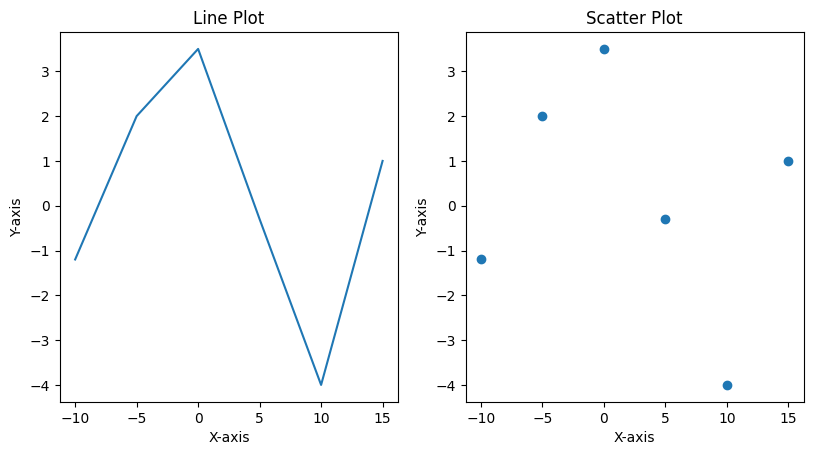

In [2]:
x =[-10, -5, 0, 5, 10, 15]
y= [-1.2, 2, 3.5, -0.3, -4, 1]

# Create a figure with two subplots arranged in one row and two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5)) #using the nrows=1, cols=2 format, set the figure size to be wide

ax1.plot(x, y) #simple line plot on the first axes
ax2.scatter(x, y) #simple scatter plot on the second axes


#set titles for each plot
ax1.set_title("Line Plot")
ax2.set_title("Scatter Plot")

#add axes labels
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")

plt.show()

### `ax.margins(...)`

If you'd like to add a bit of "padding" to a plot, `ax.margins(<some_small_fraction>)` is a very handy way to do so.  Instead of choosing "even-ish" numbers as min/max ranges for each axis, `margins` will make Matplotlib calculate the min/max of each axis by taking the range of the data and adding on a fractional amount of padding.

As an example:

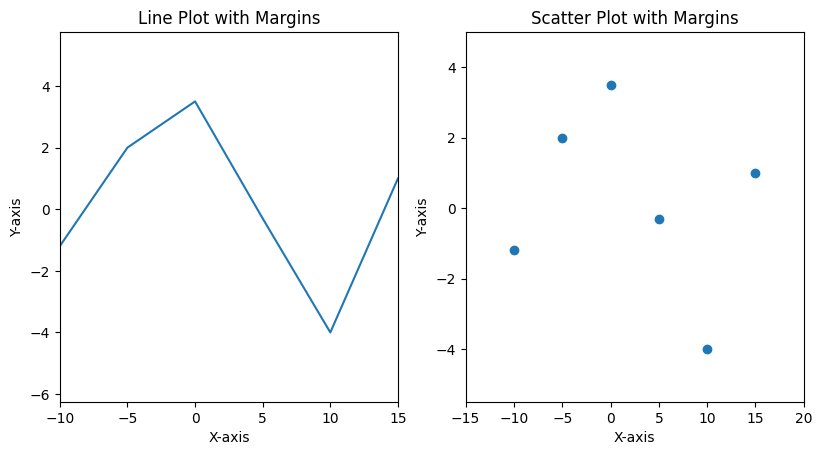

In [3]:
#recreate with margins
fig, ax = plt.subplots(1, 2, figsize=plt.figaspect(0.5)) #set as fig, ax to simplify indexing

ax[0].plot(x, y) #simple line plot on the first axes
ax[1].scatter(x, y) #simple scatter plot on the second axes
ax[0].margins(x=0.0, y=0.3) # 30% padding in the y-direction only
ax[1].margins(0.2) # 20% padding in all directions

#add titles and axes labels
ax[0].set_title("Line Plot with Margins")
ax[1].set_title("Scatter Plot with Margins")
ax[0].set_xlabel("X-axis")
ax[0].set_ylabel("Y-axis")
ax[1].set_xlabel("X-axis")
ax[1].set_ylabel("Y-axis")

plt.show()

Notice the difference in the axes labels and the distance of the points/line to the edges of the figures.

### `ax.axis(...)`

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
The `"tight"` or `"equal"` options are the most common uses of `axis`:

  * *tight*: Set axes limits to the exact range of the data
  * *equal*: Set axes scales such that one cm/inch in the y-direction is the same as one cm/inch in the x-direction. In Matplotlib terms, this sets the aspect ratio of the plot to 1.  That _doesn't_ mean that the axes "box" will be square.
  
And as an example:

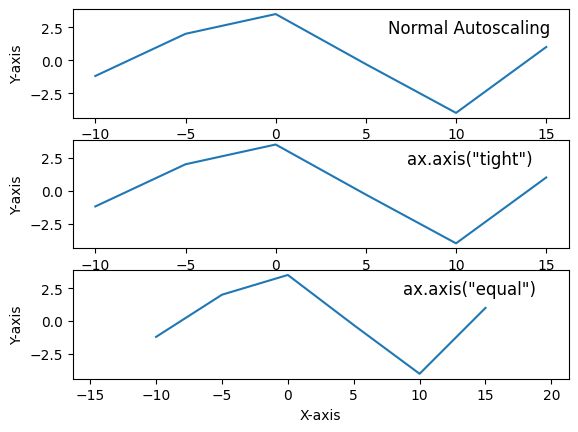

In [4]:
fig, axes = plt.subplots(nrows=3) # Create a figure with three subplots in a single column

for ax in axes:
    ax.plot(x,y )  # Plot the same data on each axes
    ax.set_ylabel("Y-axis")

axes[0].set_title('Normal Autoscaling', # Set title for the first axes, as normal autoscaling
                  y=0.7, x=0.8 # Position title at (0.8, 0.7) in axes coordinates
                  )

axes[1].set_title('ax.axis("tight")', # Set title for the second axes, indicating tight axis limits
                  y=0.7, x=0.8 # Position title at (0.8, 0.7) in axes coordinates
                  )
axes[1].axis('tight')  # Set axis limits to be tight around the data

axes[2].set_title('ax.axis("equal")', # Set title for the third axes, indicating equal scaling
                  y=0.7, x=0.8 # Position title at (0.8, 0.7) in axes coordinates
                  )
axes[2].axis('equal')  # Set equal scaling for both axes

#add x-axis label to the last axes only
axes[2].set_xlabel("X-axis")

plt.show()

### Manually setting only one limit

Another trick with limits is to specify only half of a limit. When done **after** a plot is made, this has the effect of allowing the user to anchor a limit while letting Matplotlib autoscale the rest of it.

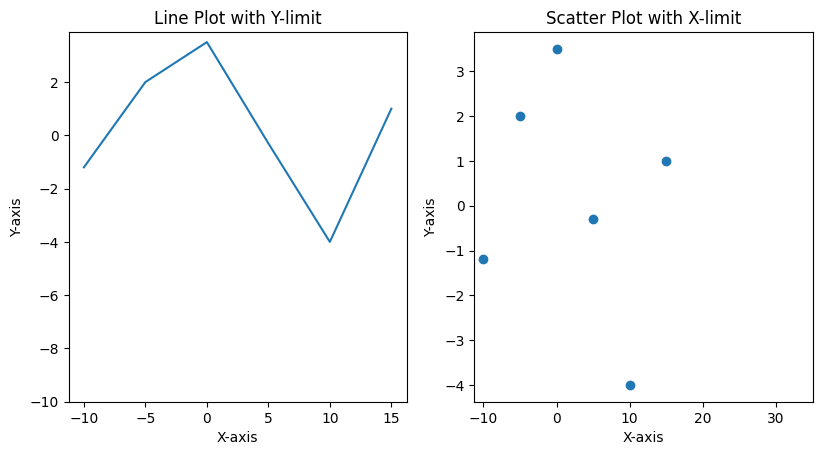

In [5]:
# Good -- setting limits after plotting is done

#recreate with limits, subplot with two plots side by side, wide figure with aspect ratio 0.5
fig, ax = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax[0].plot(x,y)  #simple line plot on the first axes
ax[1].scatter(x, y) #simple scatter plot on the second axes
ax[0].set_ylim(bottom=-10)  # Set the y-axis lower limit to -10 on the first axes
ax[1].set_xlim(right=35)  # Set the x-axis upper limit to 25 on the second axes

#add titles and axes labels
ax[0].set_title("Line Plot with Y-limit")
ax[1].set_title("Scatter Plot with X-limit")
ax[0].set_xlabel("X-axis")
ax[0].set_ylabel("Y-axis")
ax[1].set_xlabel("X-axis")
ax[1].set_ylabel("Y-axis")

plt.show()

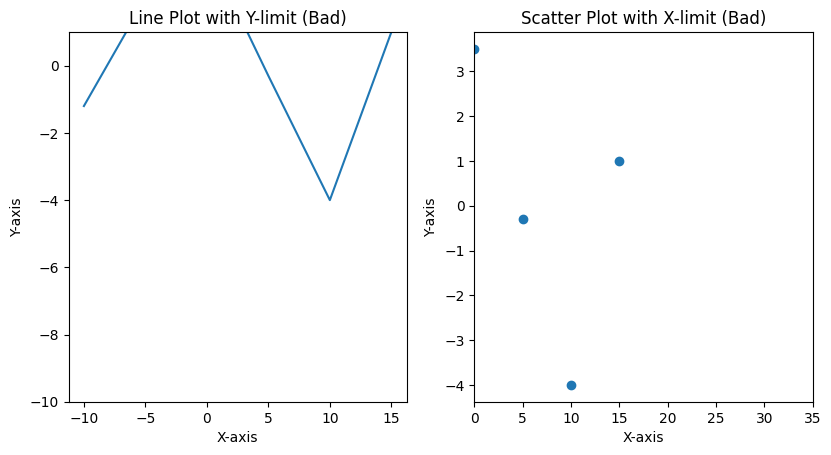

In [6]:
# Bad -- Setting limits before plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.set_ylim(bottom=-10)  # Set the y-axis lower limit to -10 on the first axes
ax2.set_xlim(right=35)  # Set the x-axis upper limit to 35 on the second axes
ax1.plot(x, y) #simple line plot on the first axes
ax2.scatter(x, y) #simple scatter plot on the second axes

#add titles and axes labels
ax1.set_title("Line Plot with Y-limit (Bad)")
ax2.set_title("Scatter Plot with X-limit (Bad)")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")    

plt.show()

# Legends

While demonstrated in previous modules, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

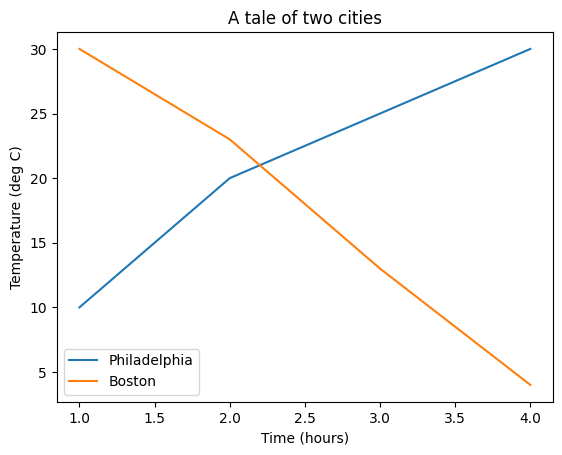

In [7]:
#make data
xP, yP = [1, 2, 3, 4], [10, 20, 25, 30] # x,y data for Philadelphia, setting variables to lists in one line
xB, yB = [1, 2, 3, 4], [30, 23, 13, 4]  # x,y data for Boston, setting variables to lists in one line

#plot data with labels for legend
fig, ax = plt.subplots()
ax.plot(xP, yP, 
        label='Philadelphia'
        )
ax.plot(xB, yB, 
        label='Boston'
        )
#set labels and title in one function call
ax.set(ylabel='Temperature (deg C)', 
       xlabel='Time (hours)', 
       title='A tale of two cities'
       )
ax.legend()
plt.show()

By default Matplotlib will choose a location to avoid overlapping plot elements as much as possible. To force this option, you can pass in the `loc` kwarg:

    ax.legend(loc="best")
    
If you happen to be plotting something that you do not want to appear in the legend, just set the label to "\_nolegend\_".

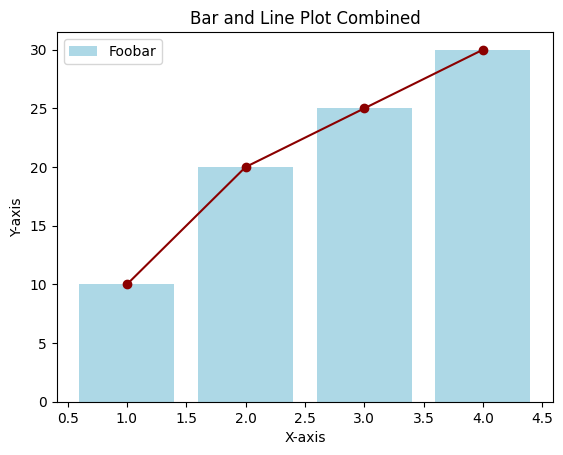

In [8]:

fig, ax = plt.subplots(1, 1)

 # Create a bar plot for Philadelphia data, x,y points defined above
ax.bar(xP, yP,
       label="Foobar", # Add label for legend
       align='center',# Align bars to center
       color='lightblue' #light blue color for bars
       )

# Create a line plot for Philadelphia data, x,y points defined above
ax.plot(xP, yP, 
        label="_nolegend_", # Exclude this plot from the legend
        marker='o', # Circle markers for data points
        color='darkred' # Dark red color for line
        )

ax.legend(loc='best')  # Add legend with best location
ax.set_title("Bar and Line Plot Combined")  # Set title for the plot
ax.set_xlabel("X-axis")  # Set x-axis label
ax.set_ylabel("Y-axis")  # Set y-axis label
plt.show()

#save the figure as a PNG file with 300 dpi resolution
fig.savefig("figures/bar_line_plot.png", dpi=300)

# Exercise 4.1

Once again, let's use a bit of what we've learned.  Try to reproduce the following figure:

<img src="images/exercise_4-1.png" width = "500">

Hint: You'll need to combine `ax.axis(...)` and `ax.margins(...)`.  Here's the data and some code to get you started:

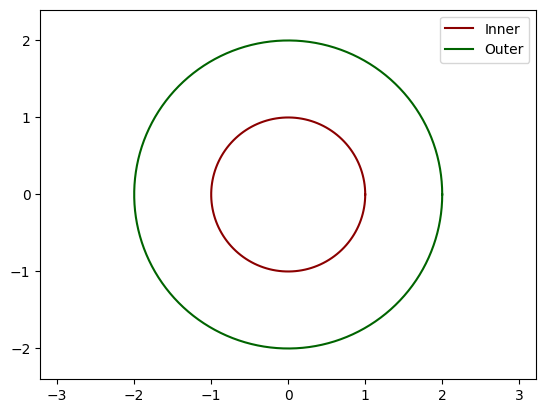

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# create data for two circles
t = np.linspace(0, 2 * np.pi, 150)
x1, y1 = np.cos(t), np.sin(t)
x2, y2 = 2 * x1, 2 * y1

fig, ax = plt.subplots()

ax.plot(x1, y1, color='darkred', label='Inner')
ax.plot(x2, y2, color='darkgreen', label='Outer')

# Combine axis scaling and margins
ax.axis('equal')
ax.margins(0.1)

ax.legend(loc='upper right')

plt.show()

# Plot boundaries: Layout, ticks, spines, etc

Matplotlib allows the user to control plot components outside of the axes, the borders of the axes, and  the amount of space around the axes.  The next section provides reasonable working knowledge of how to configure what happens around the edges of your axes.

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels) is often used to help configure your tickers.

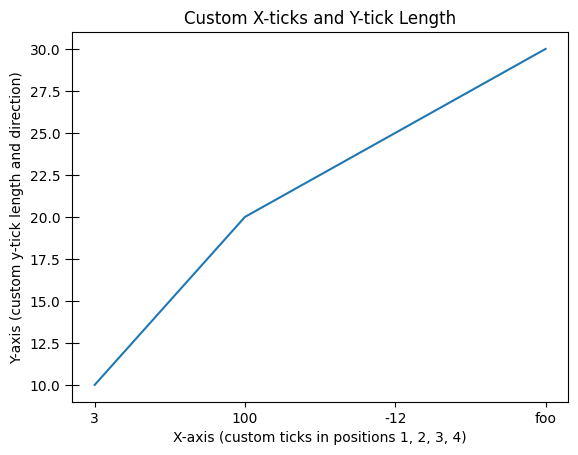

In [10]:
#create data
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]


fig, ax = plt.subplots()
ax.plot(x, y)
# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), # Set ticks at positions 1, 2, 3, 4
             ticklabels=[3, 100, -12, "foo"]# Set custom tick labels
             ) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', # Specify that we are modifying y-axis ticks
               direction='inout', # Set ticks to point both in and out
               length=10 # Set tick length to 10 points
               )

#add titles and axes labels
ax.set_title("Custom X-ticks and Y-tick Length")
ax.set_xlabel("X-axis (custom ticks in positions 1, 2, 3, 4)")
ax.set_ylabel("Y-axis (custom y-tick length and direction)")

plt.show()

# Plotting Categorical Data


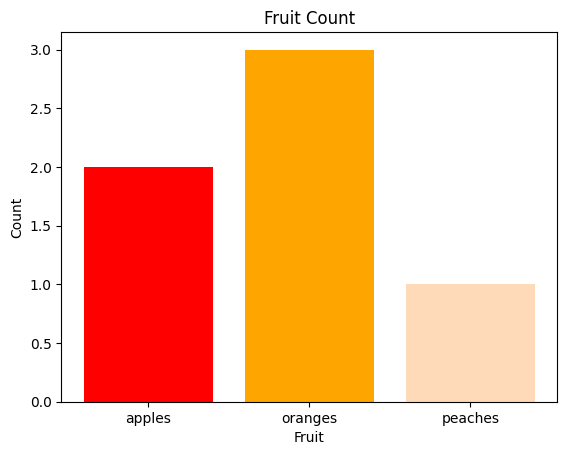

In [11]:
#create data in tuple format
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]

#Give each fruit its own color for the bars
colors = ['red', 'orange', 'peachpuff']

#zip the data into two separate lists
fruit, value = zip(*data) #the * unzips the tuples into two lists

# make the figure and axes
fig, ax = plt.subplots()
ax.bar(fruit, value, # Create a bar plot with fruit names and their corresponding values
       align='center', # Align bars to center
       color=colors # Use the specified colors for each bar, note that order matches fruit order
       )

#add title and labels
ax.set_title("Fruit Count")
ax.set_xlabel("Fruit")
ax.set_ylabel("Count")

plt.show()

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

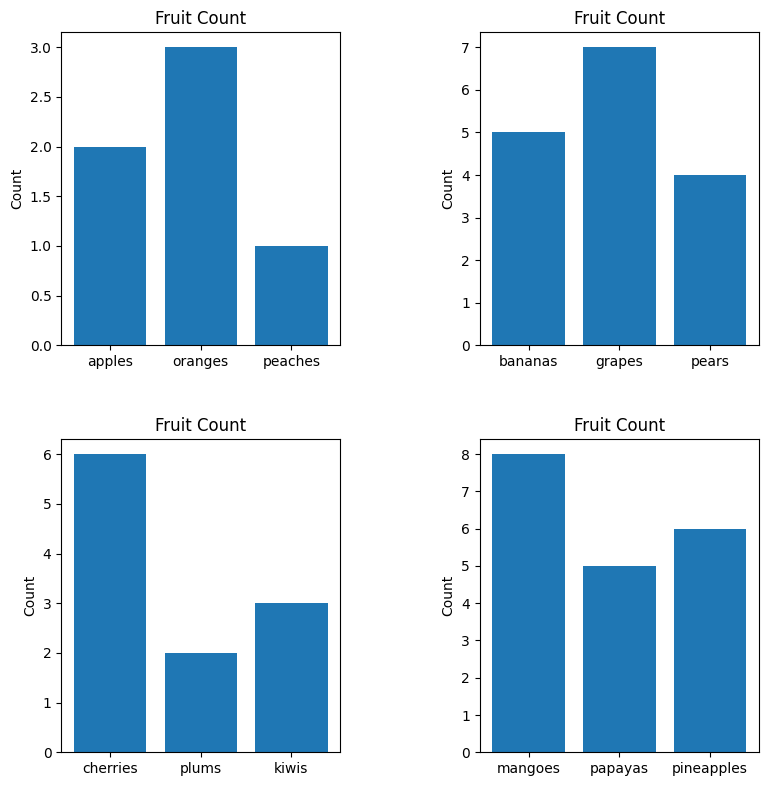

In [12]:
#make 4 sets of unique subplot data
data1 = [('apples', 2), ('oranges', 3), ('peaches', 1)]
data2 = [('bananas', 5), ('grapes', 7), ('pears', 4)]
data3 = [('cherries', 6), ('plums', 2), ('kiwis', 3)]
data4 = [('mangoes', 8), ('papayas', 5), ('pineapples', 6)]

fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# List of all data sets for easy iteration
all_data = [data1, data2, data3, data4] 


# Loop over each axes and corresponding data set, add in color list
for ax, data in zip(axes.flat, all_data):
    fruit, value = zip(*data)  # Unzip the data into fruit names and values
    ax.bar(fruit, value, # Create a bar plot with fruit names and their corresponding values
           align='center' # Align bars to center
           )
    ax.set_ylabel("Count")  # Set y-axis label for each subplot
    ax.set_title("Fruit Count")  # Set title for each subplot
# Adjust the spacing between subplots and the figure margins
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)
plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting".

 The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

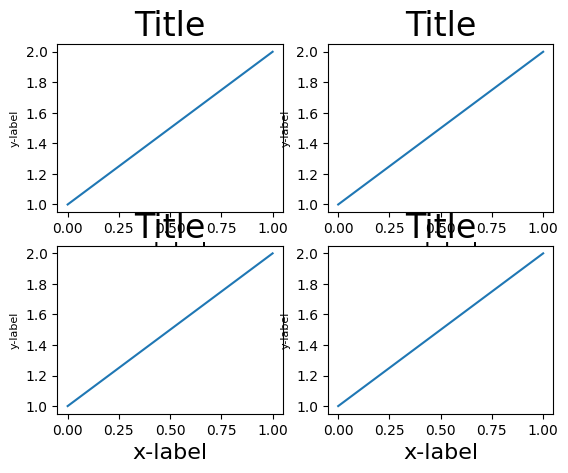

In [13]:

#create example plot function
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Enable fig.tight_layout to compare...
#fig.tight_layout()

plt.show()

## Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots to be "shared". Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains. Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

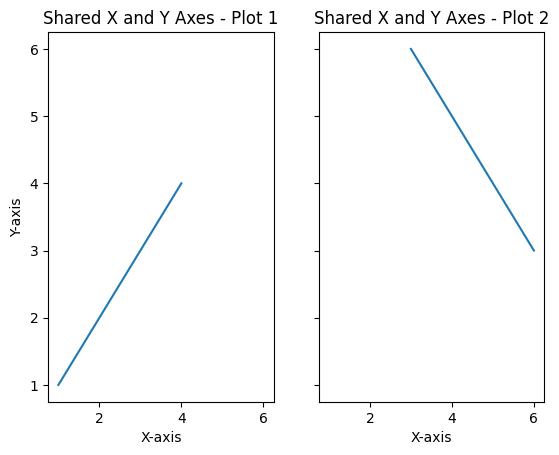

In [14]:
#make up data that can share axes   
x1, y1 = [1, 2, 3, 4], [1, 2, 3, 4]
x2, y2 = [3, 4, 5, 6], [6, 5, 4,3]

#subplot function using shared axes for both x and y
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)

#add titles and axes labels
axes[0].set_title("Shared X and Y Axes - Plot 1")
axes[1].set_title("Shared X and Y Axes - Plot 2")
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[1].set_xlabel("X-axis")


plt.show()

## "Twinning" axes
Sometimes one may want to overlay two plots on the same axes, but the scales may be entirely different. You can simply treat them as separate plots, but then twin them.

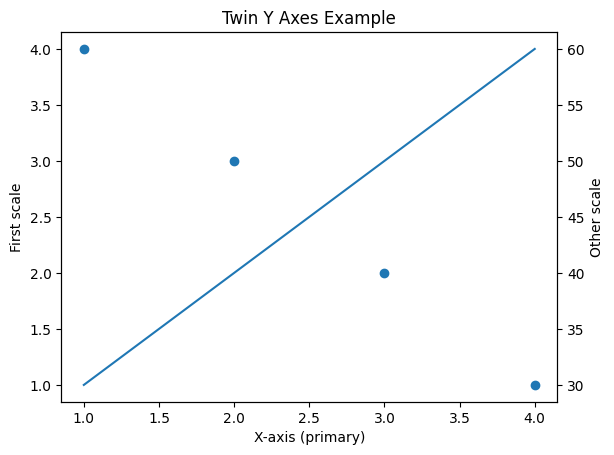

In [15]:
#make data for twin axes
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [60, 50, 40, 30]

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, y1) #plot first data set on primary y-axis, ax1
ax2 = ax1.twinx() #create secondary y-axis, ax2
ax2.scatter(x, y2) #plot second data set on secondary y-axis, ax2
ax1.set(xlabel='X-axis (primary)', ylabel='First scale') #set x and primary y axis labels
ax2.set(ylabel='Other scale') #set secondary y axis label

#add title and x axis label
ax1.set_title("Twin Y Axes Example")    

plt.show()

# Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

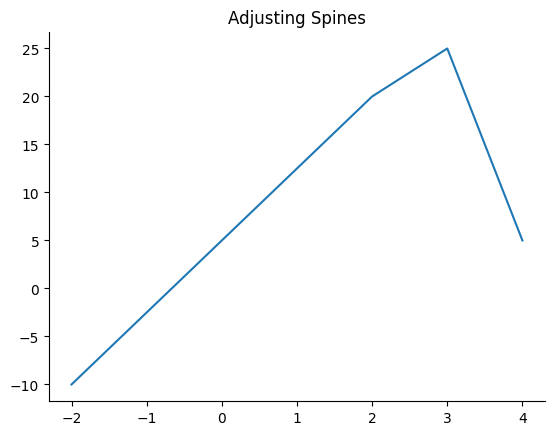

In [16]:
#create data
x, y = [-2, 2, 3, 4], [-10, 20, 25, 5]

fig, ax = plt.subplots()
ax.plot(x, y)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Adjusting Spines") # Set title for the plot
# Set ticks only on the bottom and left spines
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
# ax.spines['bottom'].set_position(('outward', 10))
# ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0), similar to origin
# ax.spines['bottom'].set_position(('data', 0))
# ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
# ax.spines['bottom'].set_position(('axes', 0.75))
# ax.spines['left'].set_position(('axes', 0.3))

plt.show()

# Exercise 4.2

This one is a bit trickier.  Once again, try to reproduce the figure below:

<img src="images/exercise_4-2.png" width = "500">


A few key hints: The two subplots have no vertical space between them (this means that the `hspace` is `0`). Note that the bottom spine is at 0 in data coordinates and the tick lines are missing from the right and top sides.

Because you're going to be doing a lot of the same things to both subplots, to avoid repitive code you might consider writing a function that takes an `Axes` object and makes the spine changes, etc to it. 



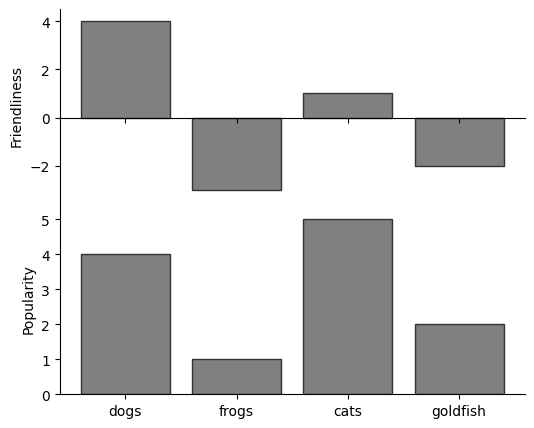

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# data already given:
# data = [('dogs', 4, 4), ('frogs', -3, 1), ('cats', 1, 5), ('goldfish', -2, 2)]
# animals, friendliness, popularity = zip(*data)

x = np.arange(len(animals))

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, sharex=True, figsize=(6, 5),
    gridspec_kw={"hspace": 0}
)

# bars
ax1.bar(x, friendliness, color="0.5", edgecolor="0.2")
ax2.bar(x, popularity,  color="0.5", edgecolor="0.2")

# labels
ax1.set_ylabel("Friendliness")
ax2.set_ylabel("Popularity")

# x ticks/labels on bottom only
ax2.set_xticks(x)
ax2.set_xticklabels(animals)

# ---- styling to match the figure ----
def style_axes(ax):
    # remove tick marks on top/right
    ax.tick_params(top=False, right=False)
    # keep spines but no ticks on those sides
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

style_axes(ax1)
style_axes(ax2)

# put the x-axis spine of the TOP plot at y=0 (data coords)
ax1.spines["bottom"].set_position(("data", 0))

# keep a divider line between plots (top plot bottom spine) and hide top spine on bottom plot
ax2.spines["top"].set_visible(False)

# limits similar to screenshot
ax1.set_ylim(-3.5, 4.5)
ax2.set_ylim(0, 5.5)

plt.show()